In [3]:
import os
from src.features.utils import load_sequences


sequences , targets = load_sequences(sequences_file="data/raw/data.npy", targets_file="data/raw/targets.npy")

print(f"Länge der Sequenzen: {len(sequences)}")
print(f"Länge der Targets: {len(targets)}")
print(sequences[0])
print(targets[0])

Länge der Sequenzen: 131603
Länge der Targets: 131603
['EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_CLOSE', 'EVENT_EXECUTE', 'EVENT_OPEN', 'EVENT_READ', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_READ', 'EVENT_READ', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_C

In [5]:
from src.features.TargetFilter import TargetFilter
from src.features.utils import save_filtered_data
# Assuming you have sequences and targets from your previous export
filter = TargetFilter(unusable_threshold=50, rare_threshold=100)

# Filter out low-frequency targets
filtered_sequences, filtered_targets, filtering_info = filter.filter_data(targets, sequences)


# Print filtering information
print(f"Total classes: {filtering_info['total_classes']}")
print(f"Unusable classes: {len(filtering_info['unusable_classes'])}")
print(f"Rare classes: {len(filtering_info['rare_classes'])}")
print(f"Usable classes: {len(filtering_info['usable_classes'])}")
print(f"Unusable classes: {filtering_info['unusable_classes']}")
print(f"Rare classes: {filtering_info['rare_classes']}")
print(f"Usable classes: {filtering_info['usable_classes']}")

print(f"Länge der gefilterten Sequenzen: {len(filtered_sequences)}")
print(f"Länge der gefilterten Targets: {len(filtered_targets)}")

print(filtered_sequences[0])
print(filtered_targets[0])


save_filtered_data(filtered_sequences, filtered_targets, "data/raw/sequences_filtered.npy", "data/raw/targets_filtered.npy")








Total classes: 114
Unusable classes: 73
Rare classes: 8
Usable classes: 41
Unusable classes: ['nginx', 'sudo', 'ls', 'screen', 'pickup', 'sed', 'tee', 'csh', 'dhclient', 'route', 'less', 'ps', 'devd', 'grep', 'hostname', 'lockf', 'php-fpm', 'init', 'cmp', 'adjkerntz', 'uname', 'minions', 'ifconfig', 'egrep', 'awk', 'mktemp', 'XIM', 'bzip2', 'su', 'kenv', 'tr', 'smtp', 'mount', 'ipfstat', 'stat', 'sort', 'expr', 'xz', 'basename', 'wc', 'tty', 'mail', 'touch', 'chown', 'mailwrapper', 'getty', 'pw', 'cut', 'chkgrp', 'diff', 'df', 'nohup', 'env', 'pfctl', 'nawk', 'uniq', 'bzcat', 'links', 'stty', 'ssh', 'vi', 'pwd_mkdb', 'limits', 'ipfw', 'jot', 'postmap', 'locale', 'kill', 'msgs', 'ping', 'kldstat', 'bounce', 'tail']
Rare classes: ['wget', 'find', 'newsyslog', 'cat', 'uptime', 'pkg', 'mkdir', 'dmesg']
Usable classes: ['vmstat', 'bash', 'sleep', 'imapd', 'date', 'unlink', 'inetd', 'sshd', 'local', 'mv', 'proxymap', 'top', 'head', 'lsof', 'trivial-rewrite', 'cron', 'mlock', 'sh', 'dd', 'wge

Ursprüngliche Targetverteilung:
Target alpine: 0.25%
Target anvil: 0.21%
Target atrun: 0.68%
Target bash: 38.94%
Target cat: 0.07%
Target cleanup: 0.25%
Target cp: 0.09%
Target cron: 2.46%
Target date: 3.58%
Target dd: 0.36%
Target dmesg: 0.04%
Target find: 0.06%
Target fortune: 0.28%
Target head: 3.61%
Target imapd: 3.18%
Target inetd: 0.68%
Target local: 0.64%
Target lsof: 3.61%
Target master: 1.31%
Target mkdir: 0.06%
Target mlock: 1.78%
Target mv: 2.51%
Target netstat: 0.10%
Target newsyslog: 0.07%
Target pkg: 0.04%
Target proxymap: 0.25%
Target python2.7: 0.21%
Target resizewin: 0.27%
Target rm: 0.12%
Target sendmail: 0.08%
Target sh: 5.93%
Target sleep: 14.39%
Target smtpd: 0.39%
Target sshd: 1.38%
Target sysctl: 0.38%
Target top: 3.69%
Target trivial-rewrite: 0.27%
Target unlink: 0.37%
Target uptime: 0.04%
Target vmstat: 7.32%
Target wget: 0.05%

Targetverteilung nach Split:
Test-Set:
Target alpine: 0.26%
Target anvil: 0.21%
Target atrun: 0.68%
Target bash: 38.94%
Target cat: 0.

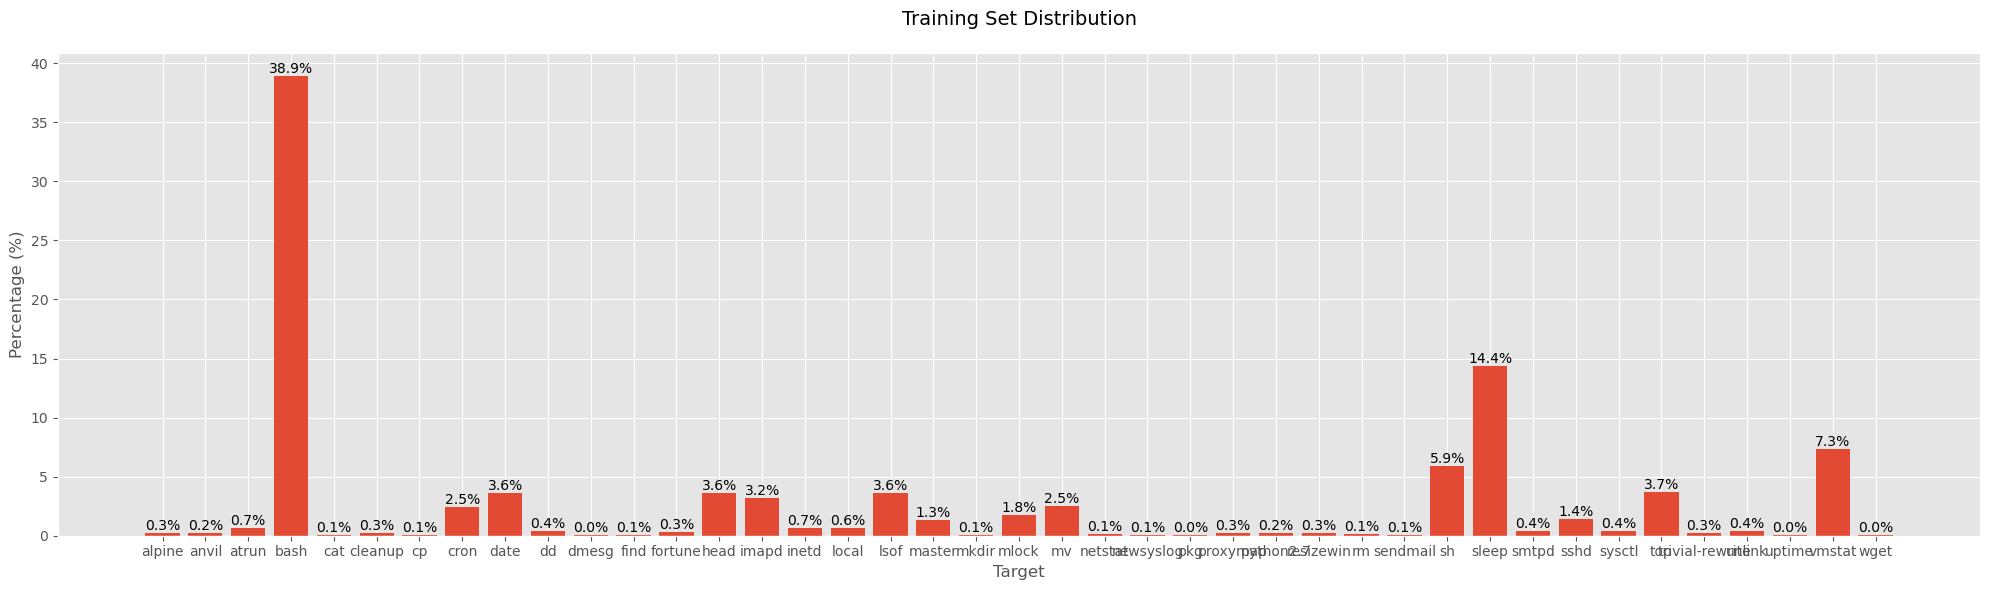

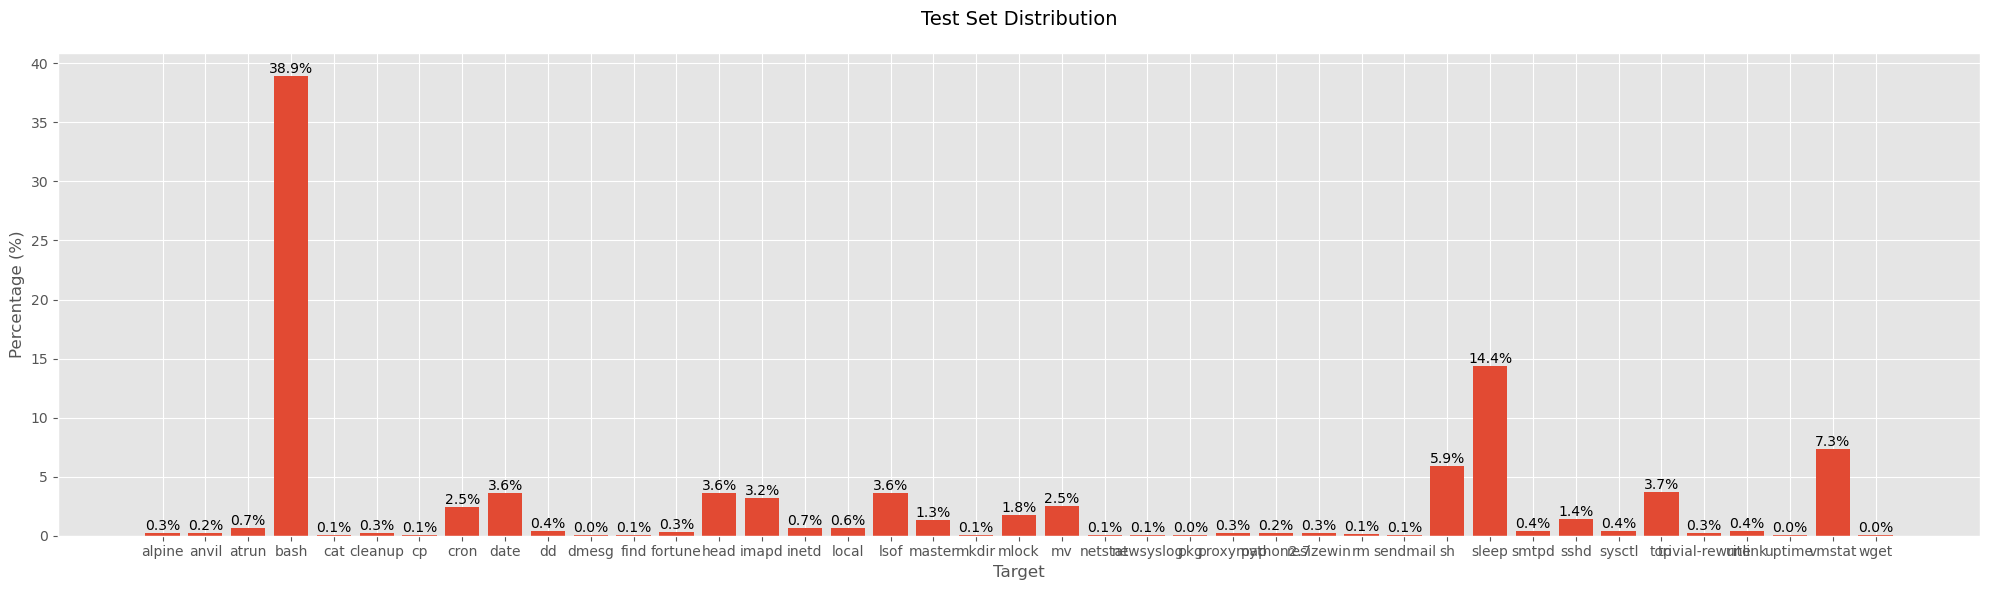

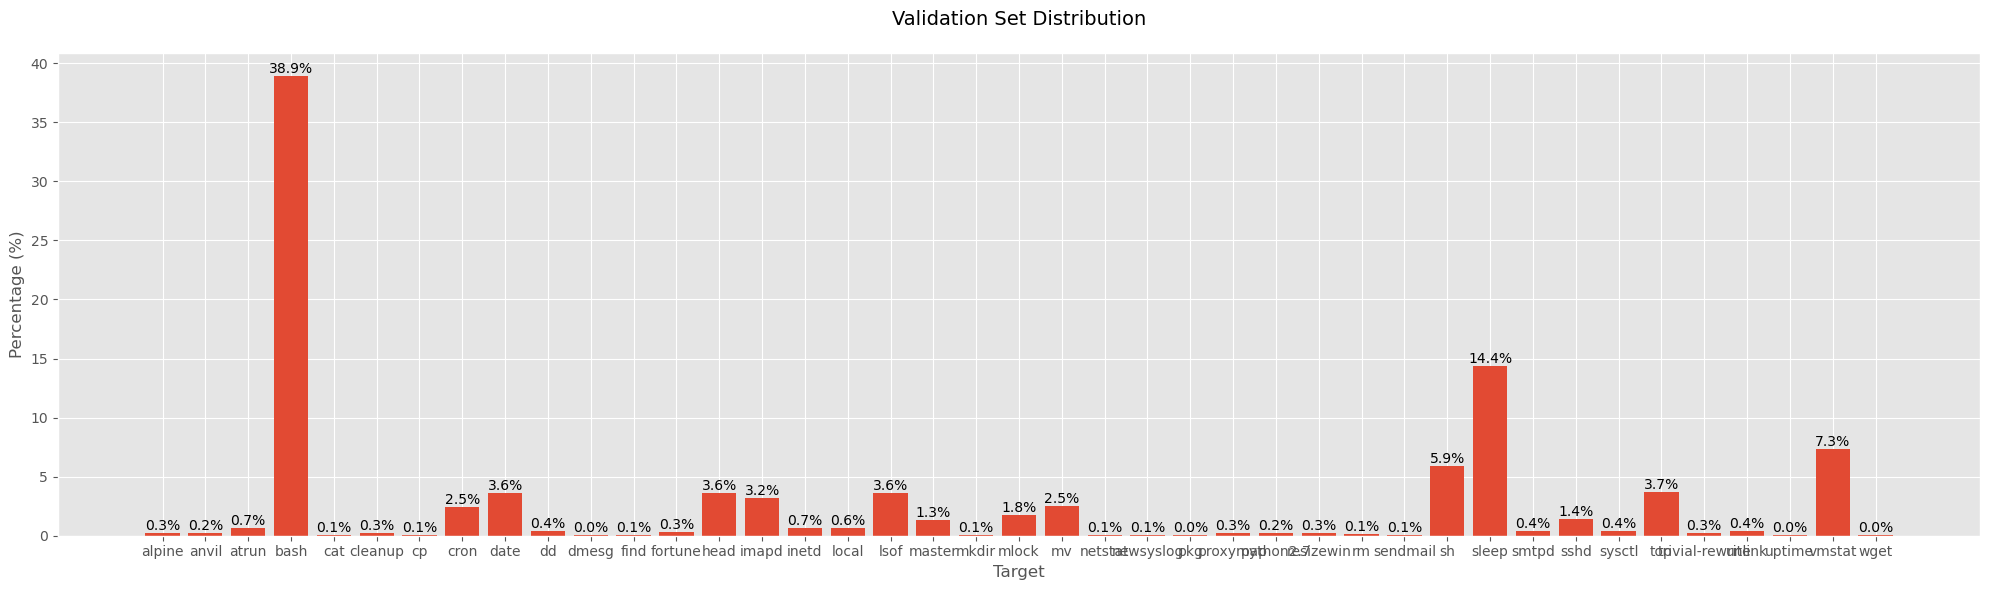


Daten gesplittet und gespeichert in data/processed
Train Samples: 78588
Test Samples: 26197
Validation Samples: 26197


In [6]:
from src.features.DataSplitter import DataSplitter
  
splitter = DataSplitter(
    sequences_file='data/raw/sequences_filtered.npy',
    targets_file='data/raw/targets_filtered.npy',
)

splitter.save_splits(output_dir='data/processed')




In [7]:

from src.features.Encoder import Encoder
from src.features.utils import load_sequences
from src.features.utils import save_filtered_data

train_encoder = Encoder()
val_encoder = Encoder()


train_sequences, train_targets = load_sequences("data/processed/train_sequences.npy", "data/processed/train_targets.npy")
print(len(train_sequences))
print(len(train_targets))


val_sequences, val_targets = load_sequences("data/processed/val_sequences.npy", "data/processed/val_targets.npy")
print(len(val_sequences))
print(len(val_targets))


# Erstellen der Vokabulare für Trainingsdaten
train_encoder.build_vocabulary(train_sequences, train_targets)

print("Event-Mappings für Trainingsset:")
print(train_encoder.idx_to_event)
print("Vocabulary-Size für Trainingsset:" , train_encoder.vocab_size)
print("Token-Mappings für Trainingsset:")
print(train_encoder.idx_to_executable)


# Erstellen der Vokabulare für Validation Daten
val_encoder.build_vocabulary(val_sequences, val_targets)

print("Event-Mappings für Validationset:")
print(val_encoder.idx_to_event)
print("Vocabulary-Size für Validationset:" , val_encoder.vocab_size)
print("Token-Mappings für Validationset:")
print(val_encoder.idx_to_executable)






# Erstellen der Token-IDs
train_sequences_encoded , train_targets_encoded = train_encoder.encode_sequences(train_sequences, train_targets)

print("sequences_encoded[0]:")
print(train_sequences_encoded[0])
print("targets_encoded[0]:")
print(train_targets_encoded[0])


val_sequences_encoded , val_targets_encoded = val_encoder.encode_sequences(val_sequences, val_targets)

print("sequences_encoded[0]:")
print(val_sequences_encoded[0])
print("targets_encoded[0]:")
print(val_targets_encoded[0])



# Brauche ich die Überlappung?
train_sequences_encoded_splitted, train_targets_encoded_splitted = train_encoder.split_long_sequences(train_sequences_encoded, train_targets_encoded)
print(len(train_sequences_encoded_splitted))
print(len(train_targets_encoded_splitted))

# Padding
train_sequences_encoded_splitted_padded = train_encoder.pad_sequences(train_sequences_encoded_splitted)
print(len(train_sequences_encoded_splitted))
print(train_sequences_encoded_splitted[0])


save_filtered_data(train_sequences_encoded_splitted_padded, train_targets_encoded_splitted, "data/encoded/train_sequences.npy", "data/encoded/train_targets.npy")



# Brauche ich die Überlappung?
val_sequences_encoded_splitted, val_targets_encoded_splitted = val_encoder.split_long_sequences(val_sequences_encoded, val_targets_encoded)
print(len(val_sequences_encoded_splitted))
print(len(val_targets_encoded_splitted))

# Padding
val_sequences_encoded_splitted_padded = val_encoder.pad_sequences(val_sequences_encoded_splitted)
print(len(val_sequences_encoded_splitted))
print(val_sequences_encoded_splitted[0])


save_filtered_data(val_sequences_encoded_splitted_padded, val_targets_encoded_splitted, "data/encoded/val_sequences.npy", "data/encoded/val_targets.npy")






78588
78588
26197
26197
Event-Mappings für Trainingsset:
{1: 'EVENT_ACCEPT', 2: 'EVENT_BIND', 3: 'EVENT_CHANGE_PRINCIPAL', 4: 'EVENT_CLOSE', 5: 'EVENT_CONNECT', 6: 'EVENT_CREATE_OBJECT', 7: 'EVENT_EXECUTE', 8: 'EVENT_EXIT', 9: 'EVENT_FCNTL', 10: 'EVENT_FLOWS_TO', 11: 'EVENT_FORK', 12: 'EVENT_LINK', 13: 'EVENT_LOGIN', 14: 'EVENT_LSEEK', 15: 'EVENT_MMAP', 16: 'EVENT_MODIFY_FILE_ATTRIBUTES', 17: 'EVENT_MODIFY_PROCESS', 18: 'EVENT_MPROTECT', 19: 'EVENT_OPEN', 20: 'EVENT_OTHER', 21: 'EVENT_READ', 22: 'EVENT_RECVFROM', 23: 'EVENT_RECVMSG', 24: 'EVENT_RENAME', 25: 'EVENT_SENDMSG', 26: 'EVENT_SENDTO', 27: 'EVENT_SIGNAL', 28: 'EVENT_TRUNCATE', 29: 'EVENT_UNLINK', 30: 'EVENT_WRITE', 0: '<PAD>'}
Vocabulary-Size für Trainingsset: 31
Token-Mappings für Trainingsset:
{0: 'alpine', 1: 'anvil', 2: 'atrun', 3: 'bash', 4: 'cat', 5: 'cleanup', 6: 'cp', 7: 'cron', 8: 'date', 9: 'dd', 10: 'dmesg', 11: 'find', 12: 'fortune', 13: 'head', 14: 'imapd', 15: 'inetd', 16: 'local', 17: 'lsof', 18: 'master', 19: 'm

In [9]:

import yaml


with open('parameter.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
vocab_size = train_encoder.vocab_size
config["data"]["vocab_size"] = vocab_size

max_seq_length = train_encoder.max_sequence_length
config["data"]["max_seq_length"] = max_seq_length

num_classes = len(filtering_info["usable_classes"])
config["data"]["num_classes"] = num_classes

with open('parameter.yaml', 'w') as file:
    yaml.dump(config, file)